Import necessary libraries:

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# Generate input data (100 points between 0 and π)
X_train = np.linspace(0, 2*np.pi, 1000).reshape(-1, 1)
# Generate target data using sine function
y_train = np.sin(X_train)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)


In [3]:
# Now define a simple neural network

class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(1, 128)    # Input Layer. nn.Linear gives us a dense layer
        #self.layer2 = nn.Linear(24, 24)   # Hidden Layer
        self.layer3 = nn.Linear(128, 64)   # Hidden Layer 2
        self.layer4 = nn.Linear(64, 1)    # Output Layer

    # Define the forward propagation of the network
    def forward(self, x):
        x = torch.relu(self.layer1(x))    # Using relu activation for now
        #x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)                # No activation for final layer since its a regression task
        return x

# Initialize model
model = NeuralNetwork()

# Switch to GPU:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Move your model to the GPU
model.to(device)


NeuralNetwork(
  (layer1): Linear(in_features=1, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=1, bias=True)
)

In [4]:
# Loss function. Use mean-squared error for now:
criterion = nn.MSELoss()

#Optimizer: Adam. Start with lr of 0.01
optimizer = optim.Adam(model.parameters(), lr=0.01)

Epoch [100/1000], Loss: 0.0532
Epoch [200/1000], Loss: 0.0117
Epoch [300/1000], Loss: 0.0021
Epoch [400/1000], Loss: 0.0003
Epoch [500/1000], Loss: 0.0046
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0013
Epoch [1000/1000], Loss: 0.0000


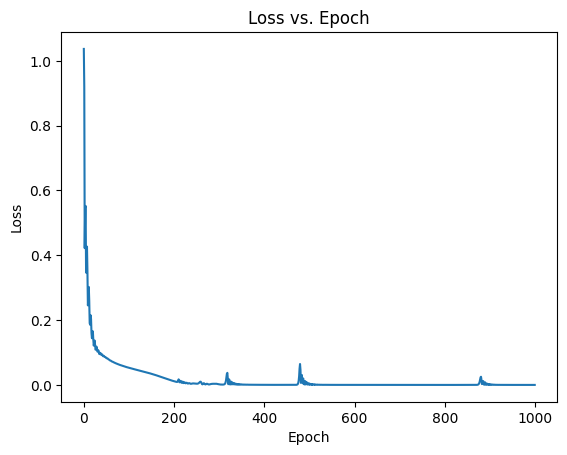

In [5]:
# Number of epochs
epochs = 1000
loss_values = []

# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass: compute the model output
    outputs = model(X_train)
    
    # Compute the loss
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()   # Zero the gradients
    loss.backward()         # Backpropagate the loss
    optimizer.step()        # Adjust weights

    # Store the loss value for plotting
    loss_values.append(loss.item())

    # Print the loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    
plt.plot(range(epochs), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()

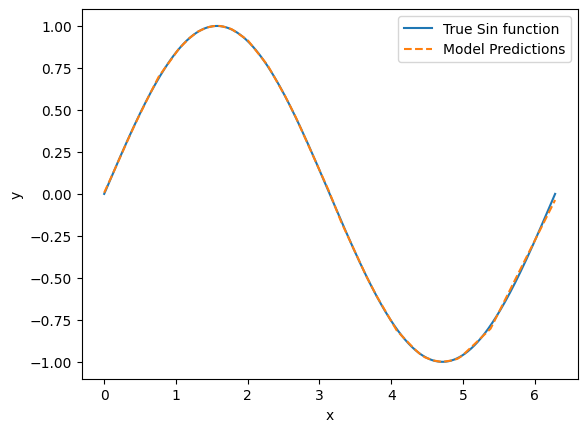

In [6]:
# Set the model to evaluation mode
model.eval()

# Generate predictions
predictions = model(X_train).detach().numpy()

# Plot results
plt.plot(X_train, y_train, label = "True Sin function")
plt.plot(X_train, predictions, label = "Model Predictions", linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()